In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv("length.txt",header=None,sep="\t")
df[1] = df[1].astype("float")
dft = df.copy()
dftax = pd.read_csv("noprimermiddle_sintax_rm_unidentifiedG.txt",header=None,sep="\t")
#dftax = dftax.set_index(0)
dftax2 = dftax.iloc[:,[0,1]]
dftax2 = dftax2.set_index(0)
dftax2 = dftax2[1].str.split(",",expand=True)
df = df.set_index(0)
#dftax2 = dftax2.set_index(0)
dfmerge = pd.merge(dftax2,df,left_index=True,right_index=True,how="left")
dfmerge2 = dfmerge.loc[:,[5,"1_y"]]
dfmerge2[5] = dfmerge2[5].str.replace("\(.*","")
dfmerge2 = dfmerge2.reset_index()
dfmerge2["sample ID"] = [a.split("_")[0] + "_" + a.split("_")[1] for a in list(dfmerge2[0])]
dfmerge2.columns = ["Read ID","Genus","length","Sample ID"]


dfmerge2["length category"] = ""
dfmerge2.loc[dfmerge2["length"] >= 1700,"length category"] = "len >= 1700"
dfmerge2.loc[((dfmerge2["length"] < 1700) & (dfmerge2["length"] >=1600)),"length category"] = "1600 <= len < 1700"
dfmerge2.loc[((dfmerge2["length"] < 1600) & (dfmerge2["length"] >=1530)),"length category"] = "1530 <= len < 1600"
dfmerge2.loc[((dfmerge2["length"] < 1530) & (dfmerge2["length"] >=1500)),"length category"] = "1500 <= len < 1530"
dfmerge2.loc[((dfmerge2["length"] < 1500) & (dfmerge2["length"] >=1430)),"length category"] = "1430 <= len < 1500"
dfmerge2.loc[((dfmerge2["length"] < 1430) & (dfmerge2["length"] >=1415)),"length category"] = "1415 <= len < 1430"
dfmerge2.loc[((dfmerge2["length"] < 1415) & (dfmerge2["length"] >=1390)),"length category"] = "1390 <= len < 1415"
dfmerge2.loc[((dfmerge2["length"] < 1390) & (dfmerge2["length"] >=1300)),"length category"] = "1300 <= len < 1390"
dfmerge2.loc[dfmerge2["length"] < 1300,"length category"] = "len < 1300"
dfmerge2["Genus"] = dfmerge2["Genus"].str.replace("g:","")
df = pd.pivot_table(dfmerge2,values='Read ID',index=['Sample ID','Genus'],columns='length category',aggfunc='count')
df["sort"] = [a[0].split("_")[1] for a in df.index]
df["sort"] = df["sort"].astype("int")
df = df.sort_values("sort").drop("sort",1)
df = df[['len < 1300', '1300 <= len < 1390', '1390 <= len < 1415', '1415 <= len < 1430','1430 <= len < 1500', '1500 <= len < 1530', '1530 <= len < 1600','1600 <= len < 1700','len >= 1700']]
df.to_csv("read_count_taxon_with_different_length.csv")
df

length category                        len < 1300  1300 <= len < 1390  \
Sample ID            Genus                                              
Test4-AMFmix-2018_1  Claroideoglomus          NaN                 NaN   
                     Corymbiglomus            NaN                 NaN   
                     Diversispora             3.0                 1.0   
                     Gigaspora                NaN                 NaN   
                     Malassezia               NaN                 NaN   
                     Phaeohelotium            NaN                 NaN   
                     Rhizophagus              2.0                 NaN   
                     Serendipita              NaN                 NaN   
Test4-AMFmix-2018_2  Inocybe                  NaN                 NaN   
                     Phaeohelotium            NaN                 NaN   
                     Rhizophagus              1.0                 NaN   
                     Serendipita              NaN                 NaN   
                     Diversispora             NaN                 NaN   
                     Gigaspora                1.0                 NaN   
Test4-AMFmix-2018_4  Diversispora             1.0                 NaN   
                     Gigaspora                NaN                 NaN   
                     Pseudotrichia            NaN                 1.0   
                     Claroideoglomus          NaN                 NaN   
                     Paraglomus               NaN                 NaN   
                     Rhizophagus              1.0                 NaN   
Test4-AMFmix-2018_5  Rhizophagus              6.0                 2.0   
                     Claroideoglomus          NaN                 NaN   
                     Diversispora             NaN                 NaN   
                     Gigaspora                NaN                 NaN   
Test4-AMFmix-2018_6  Talaromyces              NaN                 NaN   
                     Spirosphaera             NaN                 NaN   
                     Setophoma                NaN                 NaN   
                     Serendipita              NaN                 NaN   
                     Septoglomus              NaN                 NaN   
                     Rhizophagus              NaN                 NaN   
...                                           ...                 ...   
Test4-AMFmix-2018_11 Funneliformis            NaN                 NaN   
                     Serendipita              NaN                 NaN   
                     Diversispora             NaN                 NaN   
                     Derxomyces               NaN                 NaN   
                     Claroideoglomus          NaN                 NaN   
                     Cladophialophora         NaN                 NaN   
                     Glomus                   1.0                 NaN   
                     Tolypocladium            NaN                 NaN   
                     Cetraspora               NaN                 NaN   
                     Acaulospora              NaN                 NaN   
                     Trichoderma              NaN                 NaN   
                     Ambispora                NaN                 NaN   
Test4-AMFmix-2018_12 Acaulospora              NaN                 NaN   
                     Septoglomus              NaN                 NaN   
                     Rhizophagus              2.0                 NaN   
                     Diversispora             NaN                 NaN   
                     Glomus                   NaN                 1.0   
                     Gigaspora                NaN                 NaN   
                     Claroideoglomus          NaN                 NaN   
                     Cetraspora               1.0                 NaN   
                     Paraglomus               1.0                 NaN   
Test4-AMFmix-2018_13 Acaulospora              NaN         

In [8]:
df.sum()

length category
len < 1300               47.0
1300 <= len < 1390      107.0
1390 <= len < 1415      323.0
1415 <= len < 1430      157.0
1430 <= len < 1500     1804.0
1500 <= len < 1530     1177.0
1530 <= len < 1600    11972.0
1600 <= len < 1700      589.0
len >= 1700             149.0
dtype: float64

## Hist of gread length

(1000, 2000)

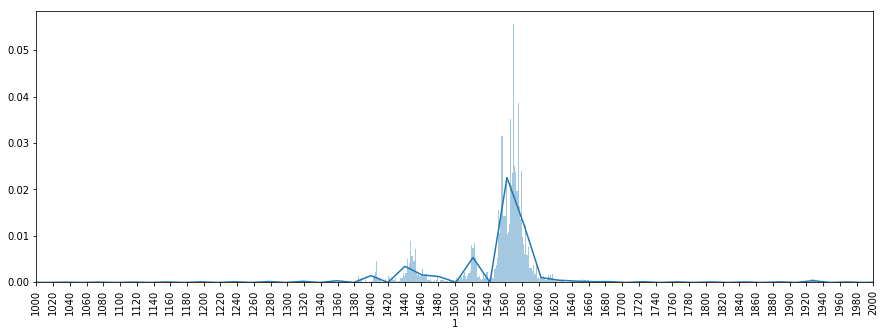

In [9]:
plt.figure(figsize=(15,5))
ax =sns.distplot(dft[1],bins=2000)
ax.set_xticks(np.arange(0,3500,20))
plt.xticks(rotation=90)
plt.xlim((1000,2000))